In [2]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

#Upload from csv
data_set_path = "school_attendance.csv"

#Read data and results
data_set_df = pd.read_csv(data_set_path)

data_set_df.head()



,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
0,00000CT,Connecticut,NaN,All Students,500285,0.9169,496092.0,0.9294,508346.0,0.9479,June 2022,07/22/2022
1,00000CT,Connecticut,Homelessness,Students Experiencing Homelessness,1814,0.8348,1735.0,0.8155,3916.0,0.8884,June 2022,07/22/2022
2,00000CT,Connecticut,Students With Disabilities,Students With Disabilities,78417,0.8899,76487.0,0.8946,80365.0,0.9277,June 2022,07/22/2022
3,00000CT,Connecticut,Free/Reduced Lunch,Free Meal Eligible,168984,0.8851,176225.0,0.8861,193706.0,0.9314,June 2022,07/22/2022
4,00000CT,Connecticut,Free/Reduced Lunch,Reduced Price Meal Eligible,29905,0.9184,30886.0,0.9299,27507.0,0.9518,June 2022,07/22/2022
5,00000CT,Connecticut,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,198889,0.8901,207111.0,0.8927,221213.0,0.9340,June 2022,07/22/2022
6,00000CT,Connecticut,English Learners,English Learners,43571,0.8976,40619.0,0.8948,45413.0,0.9389,June 2022,07/22/2022
7,00000CT,Connecticut,Race/Ethnicity,All other races,48700,0.9314,47339.0,0.9483,47260.0,0.9559,June 2022,07/22/2022
8,00000CT,Connecticut,Race/Ethnicity,Black or African American,63099,0.8941,62267.0,0.8931,64200.0,0.9401,June 2022,07/22/2022
9,00000CT,Connecticut,Race/Ethnicity,Hispanic/Latino of any race,146298,0.8935,138260.0,0.8975,136953.0,0.9362,June 2022,07/22/2022


In [9]:
#Count number of districts
name_unique = data_set_df["District name"].value_counts()
name_count = len(name_unique)
name_count

201

In [11]:
#List all columns
data_set_df.columns


Index(['District code', 'District name', 'Category', 'Student group',
       '2021-2022 student count - year to date',
       '2021-2022 attendance rate - year to date', '2020-2021 student count',
       '2020-2021 attendance rate', '2019-2020 student count',
       '2019-2020 attendance rate', 'Reporting period', 'Date update'],
      dtype='object')

In [12]:
#Check for incomplete rows
data_set_df.count()

District code                               2019
District name                               2019
Category                                    1818
Student group                               2019
2021-2022 student count - year to date      2019
2021-2022 attendance rate - year to date    2019
2020-2021 student count                     1963
2020-2021 attendance rate                   1963
2019-2020 student count                     1957
2019-2020 attendance rate                   1957
Reporting period                            2019
Date update                                 2019
dtype: int64

# Overall Category Distribution

In [48]:
#Limit down to only values for whole state
all_schools_df = data_set_df.loc[(data_set_df["District name"]=="Connecticut")&(data_set_df["Student group"]!="All Students")]
all_schools_df.head(6)

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
1,00000CT,Connecticut,Homelessness,Students Experiencing Homelessness,1814,0.8348,1735.0,0.8155,3916.0,0.8884,June 2022,07/22/2022
2,00000CT,Connecticut,Students With Disabilities,Students With Disabilities,78417,0.8899,76487.0,0.8946,80365.0,0.9277,June 2022,07/22/2022
3,00000CT,Connecticut,Free/Reduced Lunch,Free Meal Eligible,168984,0.8851,176225.0,0.8861,193706.0,0.9314,June 2022,07/22/2022
4,00000CT,Connecticut,Free/Reduced Lunch,Reduced Price Meal Eligible,29905,0.9184,30886.0,0.9299,27507.0,0.9518,June 2022,07/22/2022
5,00000CT,Connecticut,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,198889,0.8901,207111.0,0.8927,221213.0,0.9340,June 2022,07/22/2022
6,00000CT,Connecticut,English Learners,English Learners,43571,0.8976,40619.0,0.8948,45413.0,0.9389,June 2022,07/22/2022


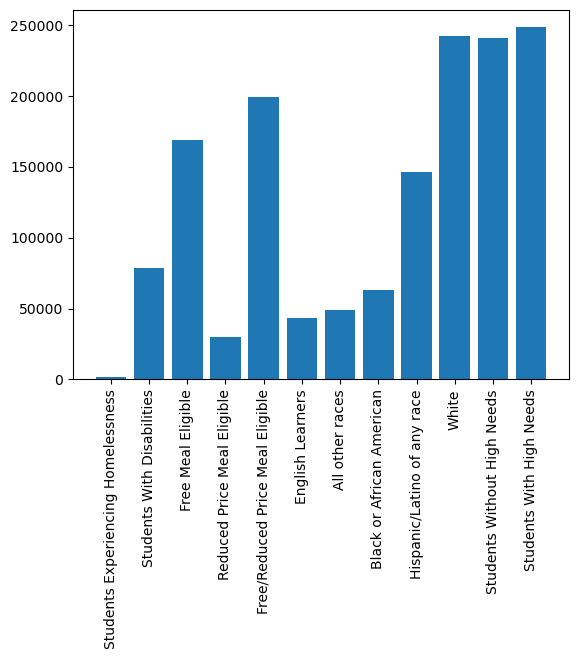

In [53]:
student_groups = all_schools_df["Student group"]

counts = all_schools_df["2021-2022 student count - year to date"]

x_axis = np.arange(len(student_groups))
plt.bar(x_axis, counts)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, student_groups, rotation=90)

plt.show()

In [28]:
#Limit down to all students and free/reduced meal groups
all_fr_df = all_schools_df.loc[(all_schools_df["Student group"]=="All Students") | (all_schools_df["Student group"]=="Free/Reduced Price Meal Eligible")]
all_fr_df

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
0,00000CT,Connecticut,NaN,All Students,500285,0.9169,496092.0,0.9294,508346.0,0.9479,June 2022,07/22/2022
5,00000CT,Connecticut,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,198889,0.8901,207111.0,0.8927,221213.0,0.9340,June 2022,07/22/2022


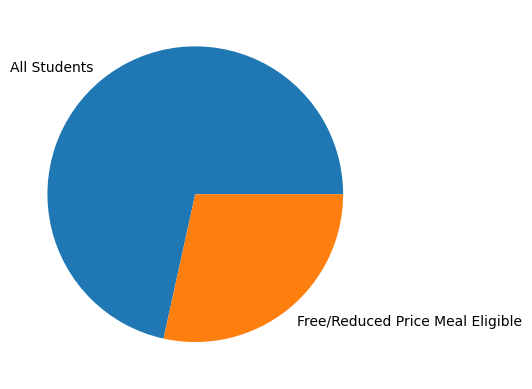

In [37]:

for index,row in all_fr_df.iterrows():
    fr_count.append(row[4])
    fr_groups.append(row[3])

#Make Pie Chart
plt.pie(fr_count, labels=fr_groups)
plt.show()

# Free and Reduced Meals

In [89]:
#Filter by free and reduced meals
fr_df = data_set_df.loc[(data_set_df["Student group"]=="Free/Reduced Price Meal Eligible") | (data_set_df["Student group"]=="All Students")]

fr_df["District name"].value_counts()

District name
Connecticut                       2
Torrington School District        2
Vernon School District            2
Voluntown School District         2
Wallingford School District       2
                                 ..
The Woodstock Academy District    2
Union School District             1
Sherman School District           1
Hampton School District           1
New Canaan School District        1
Name: count, Length: 201, dtype: int64

In [96]:
fr_df=fr_df[(fr_df["District name"]!="Union School District")&(fr_df["District name"]!="Sherman School District")&(fr_df["District name"]!="Hampton School District")&(fr_df["District name"]!="New Canaan School District")]
fr_df['District name'].value_counts()

District name
Connecticut                       2
Trumbull School District          2
Voluntown School District         2
Wallingford School District       2
Waterbury School District         2
                                 ..
Marlborough School District       2
Meriden School District           2
Middletown School District        2
Milford School District           2
The Woodstock Academy District    2
Name: count, Length: 197, dtype: int64

In [98]:
#Loop and pull out counts
#Make lists
all_students_counts=[]
fr_students_counts=[]

#Create loop to create lists for counts
for index, row in fr_df.iterrows():
    if row["Student group"]=="All Students":
        all_students_counts.append(row["2021-2022 student count - year to date"])
    if row["Student group"]=="Free/Reduced Price Meal Eligible":
        fr_students_counts.append(row["2021-2022 student count - year to date"])

#Make percents list to store percent free and reduced meals of each school
i=0
percents = []
#Loop to add to percents list
for item in fr_students_counts:
    percents.append(fr_students_counts[i]/all_students_counts[i])
    i=i+1
    


[0.3975513957044485,
 0.18633540372670807,
 0.6624590930341281,
 0.3294460641399417,
 0.09355577363428197,
 0.22110552763819097,
 0.2131649445082281,
 0.1278772378516624,
 0.2911025145067698,
 0.5409457900807382,
 0.24161073825503357,
 0.4025157232704403,
 0.3506133755441235,
 0.6208202575478844,
 0.5351525742707353,
 0.20196463654223967,
 0.3246268656716418,
 0.2987012987012987,
 0.289044289044289,
 0.179890560875513,
 0.46853146853146854,
 0.14906530711337704,
 0.2523364485981308,
 0.3523107836570663,
 0.23633815973843997,
 0.26666666666666666,
 0.2179176755447942,
 0.3047619047619048,
 0.2253066494512589,
 0.2594767752269087,
 0.49707205295765083,
 0.016898395721925134,
 0.3446601941747573,
 0.43617021276595747,
 0.24603174603174602,
 0.14183551847437426,
 0.24921135646687698,
 0.20548744892002335,
 0.639405811296115,
 0.3225563909774436,
 0.21755872160184828,
 0.10971428571428571,
 0.5283213182286303,
 0.16718995290423863,
 0.4319742489270386,
 0.2140221402214022,
 0.15072055477299

In [113]:
#Make list of school districts
schools = []

#If district in list is not the same as the item before it, add it to the list
district_name_df = fr_df["District name"]
i=0
for item in district_name_df:
    if item[i]!=district_name_df[i+1]:
        schools.append(district_name_df[i])
    i = i+1
schools


KeyError: 1